In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('6_Data.csv')

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
df.shape

(99457, 10)

In [6]:
# Add a new column for sales amount (quantity * price)
df['sales_amount'] = df['quantity'] * df['price']

# Aggregate sales data by 'shopping_mall' (region), 'category' (product category), and sum the sales amount
aggregated_data = df.groupby(['shopping_mall', 'category'])['sales_amount'].sum().reset_index()

# Display the aggregated data
print(aggregated_data)

   shopping_mall         category  sales_amount
0    Cevahir AVM            Books      44541.00
1    Cevahir AVM         Clothing    5706321.28
2    Cevahir AVM        Cosmetics     321214.00
3    Cevahir AVM  Food & Beverage      44010.45
4    Cevahir AVM            Shoes    3243918.85
..           ...              ...           ...
75  Zorlu Center  Food & Beverage      41955.06
76  Zorlu Center            Shoes    3535601.47
77  Zorlu Center         Souvenir      28996.56
78  Zorlu Center       Technology    2987250.00
79  Zorlu Center             Toys     197550.08

[80 rows x 3 columns]


In [7]:
# Add a new column for sales amount (quantity * price)
df['sales_amount'] = df['quantity'] * df['price']

# Group the data by 'shopping_mall' (region) and calculate the total sales amount for each region
total_sales_by_region = df.groupby('shopping_mall')['sales_amount'].sum().reset_index()

# Display the total sales by region
print(total_sales_by_region)

       shopping_mall  sales_amount
0        Cevahir AVM   12645138.20
1  Emaar Square Mall   12406100.29
2     Forum Istanbul   12303921.24
3       Istinye Park   24618827.68
4             Kanyon   50554231.10
5   Mall of Istanbul   50872481.68
6          Metrocity   37302787.33
7       Metropol AVM   25379913.19
8     Viaport Outlet   12521339.72
9       Zorlu Center   12901053.82


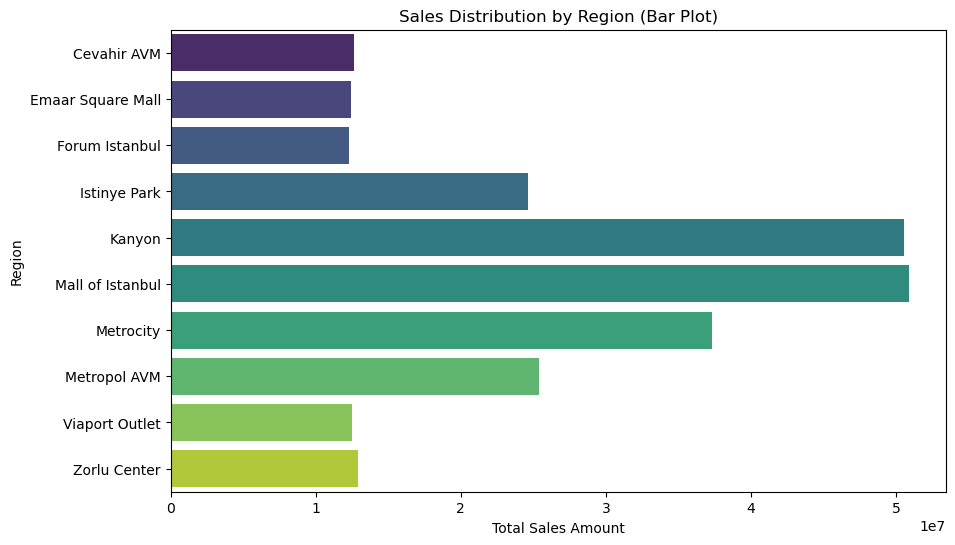

In [10]:
# 1. Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x='sales_amount', y='shopping_mall', data=total_sales_by_region, palette='viridis')
plt.title('Sales Distribution by Region (Bar Plot)')
plt.xlabel('Total Sales Amount')
plt.ylabel('Region')
plt.show()

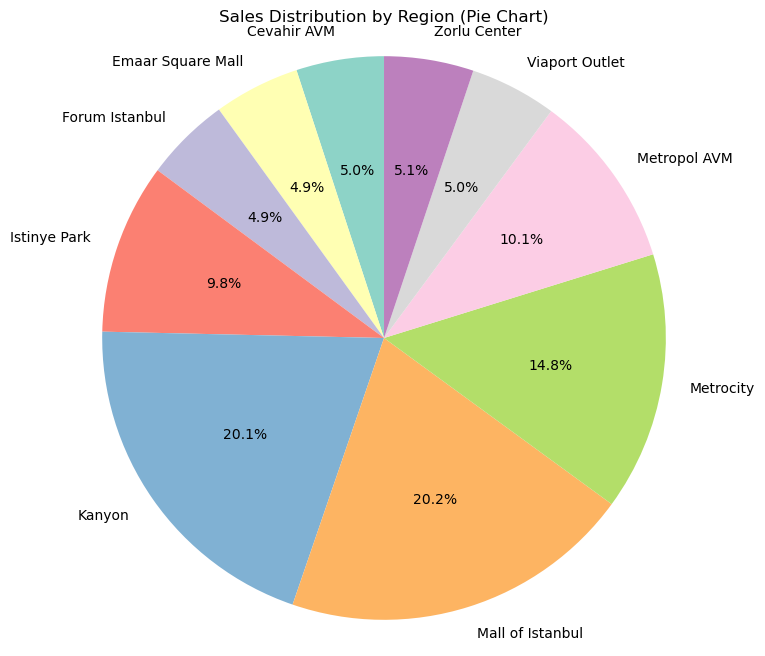

In [11]:
# 2. Pie Chart
plt.figure(figsize=(8,8))
plt.pie(total_sales_by_region['sales_amount'], labels=total_sales_by_region['shopping_mall'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(total_sales_by_region)))
plt.title('Sales Distribution by Region (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

In [12]:
# Sort the data by 'sales_amount' in descending order to get top-performing regions
top_performing_regions = total_sales_by_region.sort_values(by='sales_amount', ascending=False)

# Display the top-performing regions
print(top_performing_regions)

       shopping_mall  sales_amount
5   Mall of Istanbul   50872481.68
4             Kanyon   50554231.10
6          Metrocity   37302787.33
7       Metropol AVM   25379913.19
3       Istinye Park   24618827.68
9       Zorlu Center   12901053.82
0        Cevahir AVM   12645138.20
8     Viaport Outlet   12521339.72
1  Emaar Square Mall   12406100.29
2     Forum Istanbul   12303921.24


In [13]:
total_sales_by_region_category = df.groupby(['shopping_mall', 'category'])['sales_amount'].sum().reset_index()

# Display the total sales by region and product category
print(total_sales_by_region_category)

   shopping_mall         category  sales_amount
0    Cevahir AVM            Books      44541.00
1    Cevahir AVM         Clothing    5706321.28
2    Cevahir AVM        Cosmetics     321214.00
3    Cevahir AVM  Food & Beverage      44010.45
4    Cevahir AVM            Shoes    3243918.85
..           ...              ...           ...
75  Zorlu Center  Food & Beverage      41955.06
76  Zorlu Center            Shoes    3535601.47
77  Zorlu Center         Souvenir      28996.56
78  Zorlu Center       Technology    2987250.00
79  Zorlu Center             Toys     197550.08

[80 rows x 3 columns]


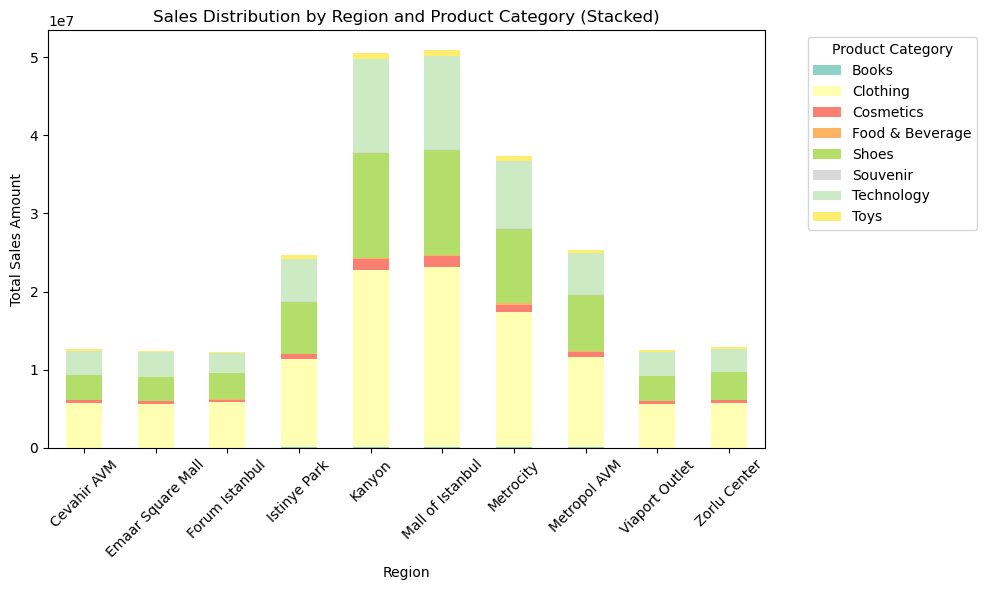

In [14]:
# Group the data by 'shopping_mall' (region) and 'category' (product category) to calculate the total sales amount
total_sales_by_region_category = df.groupby(['shopping_mall', 'category'])['sales_amount'].sum().unstack()

# Plot a stacked bar plot
total_sales_by_region_category.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

plt.title('Sales Distribution by Region and Product Category (Stacked)')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13836\800967799.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='shopping_mall', y='sales_amount', hue='category', data=df, ci=None, palette='Set3')


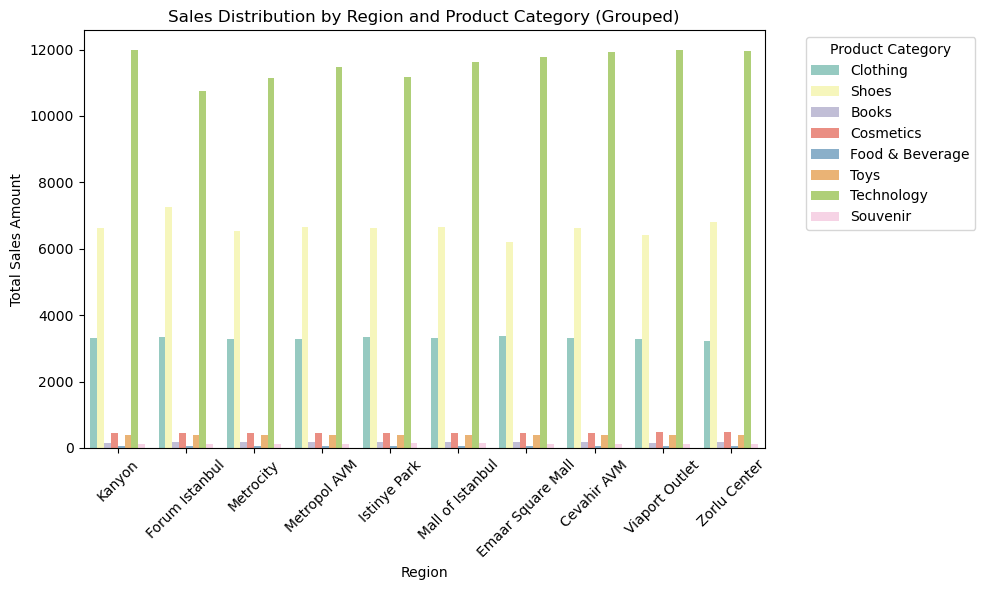

In [15]:
# Plot a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='shopping_mall', y='sales_amount', hue='category', data=df, ci=None, palette='Set3')

plt.title('Sales Distribution by Region and Product Category (Grouped)')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()